<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/CircularHierarchyExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install circlify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
data = [{'id': 'World', 'datum': 6964195249, 'children' : [
              {'id' : "North America", 'datum': 450448697,
                   'children' : [
                     {'id' : "United States", 'datum' : 308865000},
                     {'id' : "Mexico", 'datum' : 107550697},
                     {'id' : "Canada", 'datum' : 34033000} 
                   ]},
              {'id' : "South America", 'datum' : 278095425, 
                   'children' : [
                     {'id' : "Brazil", 'datum' : 192612000},
                     {'id' : "Colombia", 'datum' : 45349000},
                     {'id' : "Argentina", 'datum' : 40134425}
                   ]},
              {'id' : "Europe", 'datum' : 209246682,  
                   'children' : [
                     {'id' : "Germany", 'datum' : 81757600},
                     {'id' : "France", 'datum' : 65447374},
                     {'id' : "United Kingdom", 'datum' : 62041708}
                   ]},
              {'id' : "Africa", 'datum' : 311929000,  
                   'children' : [
                     {'id' : "Nigeria", 'datum' : 154729000},
                     {'id' : "Ethiopia", 'datum' : 79221000},
                     {'id' : "Egypt", 'datum' : 77979000}
                   ]},
              {'id' : "Asia", 'datum' : 2745929500,  
                   'children' : [
                     {'id' : "China", 'datum' : 1336335000},
                     {'id' : "India", 'datum' : 1178225000},
                     {'id' : "Indonesia", 'datum' : 231369500}
                   ]}
    ]}]
    

In [4]:
# import the circlify library
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


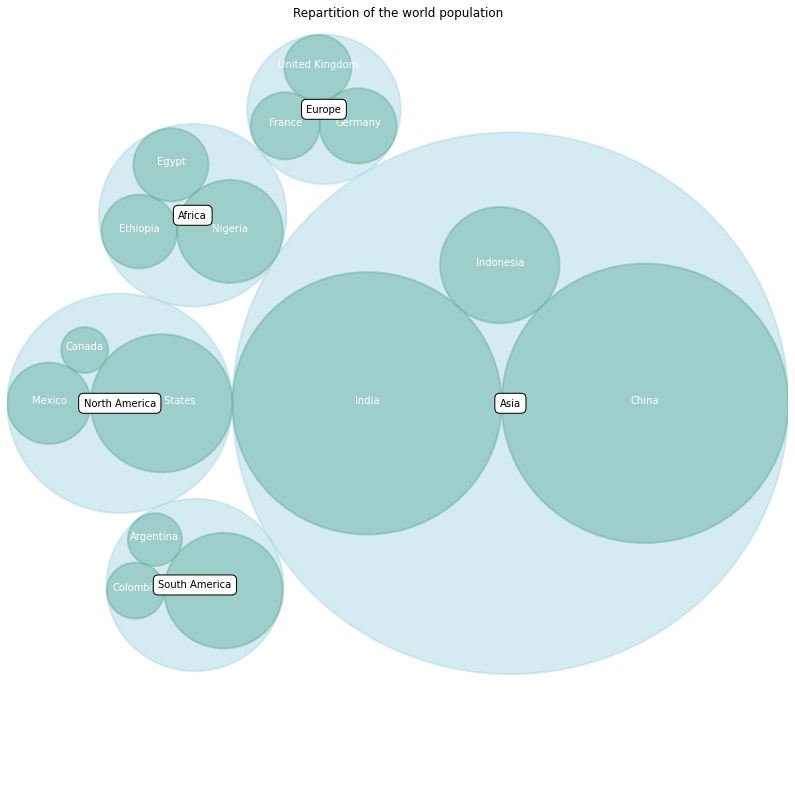

In [5]:
# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))